In [514]:
!pip install openai --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [573]:
from pptx.dml.color import RGBColor
from pptx import Presentation
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
from pptx.util import Pt
from datetime import datetime

In [305]:
# week1~3까지 데이터가 있다고 가정 (shorts 3개씩)
excel_file = "test_report_0103.xlsx"
week1 = pd.read_excel(excel_file, sheet_name="week1")
week2 = pd.read_excel(excel_file, sheet_name="week2")
week3 = pd.read_excel(excel_file, sheet_name="week3")

In [597]:
# 프레젠테이션 파일 로드
def load_presentation(file_path):
    return Presentation(file_path)

# 첫 번째 슬라이드에서 날짜 업데이트 함수
def update_date_on_slide(slide, today):
    for shape in slide.shapes:
        if shape.has_text_frame:
            if "2025-" in shape.text:
                shape.text = shape.text.replace("2025-", today)

# 이미지 추가 함수
def add_thumbnail_with_hyperlink(slide, image_url, hyperlink_url, left, top, width, height):
    try:
        # URL에서 이미지 다운로드
        response = requests.get(image_url, verify=False)  # SSL 인증 비활성화
        if response.status_code == 200:
            image_stream = BytesIO(response.content)
            # 슬라이드에 이미지 추가
            image = slide.shapes.add_picture(image_stream, left, top, width, height)
            # 하이퍼링크 추가
            image.click_action.hyperlink.address = hyperlink_url
            print(f"Image added with hyperlink to {hyperlink_url}")
        else:
            print(f"Failed to download image. HTTP Status Code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while downloading the image: {e}")

# 슬라이드 업데이트 함수
def update_slide_with_data(slide, views, likes, channel_name, title):
    for shape in slide.shapes:
        if shape.has_text_frame:
            # "조회수"를 업데이트
            if "조회수:" in shape.text:
                shape.text = shape.text.replace("조회수:", f"조회수: {views:,}")
                for paragraph in shape.text_frame.paragraphs:
                    for run in paragraph.runs:
                        run.font.size = Pt(10)
            # "좋아요"를 업데이트
            elif "좋아요:" in shape.text:
                shape.text = shape.text.replace("좋아요:", f"좋아요: {likes:,}")
                for paragraph in shape.text_frame.paragraphs:
                    for run in paragraph.runs:
                        run.font.size = Pt(10)
            elif "쇼츠제목" in shape.text:
                shape.text = shape.text.replace("쇼츠제목", title)
                for paragraph in shape.text_frame.paragraphs:
                    for run in paragraph.runs:
                        run.font.size = Pt(10)
            # "채널명"을 업데이트
            elif "채널명:" in shape.text:
                shape.text = shape.text.replace("채널명:", f"채널명: {channel_name}")
                for paragraph in shape.text_frame.paragraphs:
                    for run in paragraph.runs:
                        run.font.size = Pt(10)

# 4~6 페이지에 데이터 적용
def apply_data_to_slides(prs, sorted_data):
    for i, slide_index in enumerate(range(3, 6)):  # 4번째, 5번째, 6번째 슬라이드
        if i < len(sorted_data):
            slide = prs.slides[slide_index]
            row = sorted_data.iloc[i]
            update_slide_with_data(
                slide,
                views=row["shorts_view"],
                likes=row["shorts_likes"],
                channel_name=row["channel_name"],
                title=row["shorts_title"]
            )

            # 썸네일과 하이퍼링크 추가
            shorts_thumbnail = row["shorts_thumbnail"]
            hyperlink_url = row["shorts_url"]
            left = Inches(0.5)
            top = Inches(1.7)
            width = Inches(2)
            height = Inches(1)
            add_thumbnail_with_hyperlink(slide, shorts_thumbnail, hyperlink_url, left, top, width, height)


# 7번째 슬라이드에 워드클라우드 추가 함수
def add_wordcloud_to_seventh_slide(prs, wordcloud_path):
    try:
        # 7번째 슬라이드 선택 (인덱스 6)
        seventh_slide = prs.slides[6]

        # 워드클라우드 이미지 위치 및 크기 설정
        left = Inches(2)
        top = Inches(0.8)
        width = Inches(5.4)
        height = Inches(2.7)

        seventh_slide.shapes.add_picture(wordcloud_path, left, top, width, height)
        print(f"Wordcloud added from {wordcloud_path}")
    except IndexError:
        print("The seventh slide does not exist in the presentation.")
    except Exception as e:
        print(f"An error occurred while adding the wordcloud: {e}")

# 메인 실행 함수
def main():
    prs = load_presentation("YT_report_ideation_test.pptx")

    # 첫 번째 슬라이드 업데이트
    today_date = datetime.now().strftime("%Y-%m-%d")
    update_date_on_slide(prs.slides[0], today_date)

    # 데이터 적용 (예: sorted_data 필요)
    apply_data_to_slides(prs, sorted_data)

    today_date_filename = datetime.now().strftime("%Y%m%d")
    wordcloud_path = f"week1_{today_date_filename}.png"
    add_wordcloud_to_seventh_slide(prs, wordcloud_path)

    # 저장
    output_file = "updated_weekly_report_with_image_and_wordcloud.pptx"
    prs.save(output_file)
    print(f"Presentation saved as {output_file}")


In [599]:
if __name__ == "__main__":
    main()

Image added with hyperlink to https://www.youtube.com/watch?v=_V75fUlayts
Image added with hyperlink to https://www.youtube.com/watch?v=1uaDvx_UqPc
Image added with hyperlink to https://www.youtube.com/watch?v=3wxe_Pk9q80
Wordcloud added from week1_20250110.png
Presentation saved as updated_weekly_report_with_image_and_wordcloud.pptx


### Google Trend

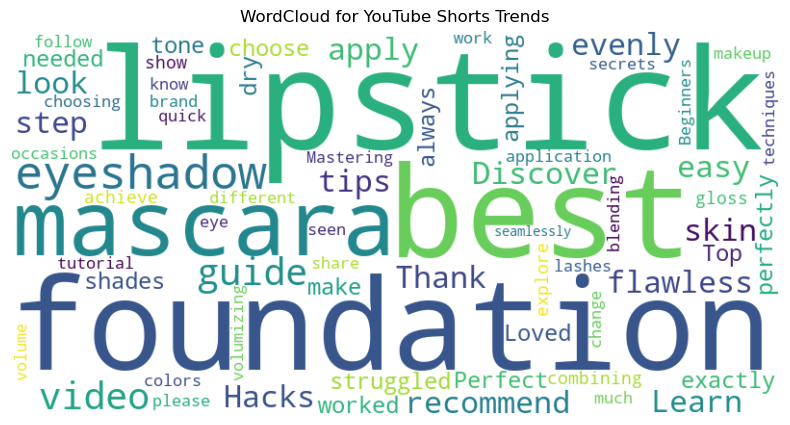

WordCloud image saved as ./week1_20250110.png
WordCloud saved at: ./week1_20250110.png
Extracted Keywords: {'lipstick': 5, 'best': 4, 'foundation': 4, 'eyeshadow': 4, 'mascara': 3, 'Learn': 2, 'Discover': 2, 'apply': 2, 'flawless': 2, 'guide': 2}
Google Trends Data: {'lipstick': 1.0, 'best': 70.18343195266272, 'foundation': 2.7928994082840237, 'eyeshadow': 0.005917159763313609, 'mascara': 1.0650887573964498, 'Learn': 16.035502958579883, 'Discover': 5.680473372781065, 'apply': 29.97041420118343, 'flawless': 1.0, 'guide': 78.0}


In [585]:
from pytrends.request import TrendReq
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ssl
import urllib3
from datetime import datetime

# SSL 인증서 경고 무시 설정
ssl._create_default_https_context = ssl._create_unverified_context
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Step 1: Generate Mock Data (YouTube Shorts Data)
def generate_mock_data():
    channels = []

    # Manually creating realistic mock data for cosmetics-related content
    channels.append({
        "channel": "BeautyTipsChannel",
        "titles": ["Top 5 Lipstick Hacks", "The Perfect Foundation Guide"],
        "descriptions": [
            "Learn how to choose the best lipstick shades for your skin tone.",
            "Discover how to apply foundation for a flawless look."
        ],
        "comments": [
            "This lipstick guide was exactly what I needed!",
            "Can you recommend a foundation for dry skin?",
            "I always struggled with applying lipstick evenly. Thank you!",
            "The foundation tips worked perfectly for me. Loved it!",
            "Can you make a video about combining lipstick with gloss?"
        ],
        "scripts": [
            "In this video, we explore easy hacks to apply lipstick evenly.",
            "We'll show you how to achieve a flawless foundation application step by step."
        ]
    })

    channels.append({
        "channel": "GlamUp",
        "titles": ["Mastering Mascara", "Best Eyeshadow for Beginners"],ㅏㅑㅜ
        "descriptions": [
            "A quick guide to choosing the best mascara for volume.",
            "Learn which eyeshadow colors work for different occasions."
        ],
        "comments": [
            "I didn't know how much mascara could change my look!",
            "Your eyeshadow tips are so easy to follow!",
            "What brand of mascara do you recommend?",
            "This is the best eyeshadow tutorial I've seen. Thanks!",
            "More videos on eye makeup, please!"
        ],
        "scripts": [
            "Discover the secrets to volumizing your lashes with mascara.",
            "We share the best techniques for blending eyeshadow seamlessly."
        ]
    })

    # Add more channels as needed for diversity in content
    return channels

def get_stopwords():
    korean_stopwords = {"이", "그", "저", "것", "수", "때", "등", "들", "및", "와", "의", "가", "을", "를", "에", "과", "하고", "은", "는", "입니다", "있습니다", "했다", "합니다"}
    english_stopwords = set(STOPWORDS)
    english_stopwords.update(["this", "for", "with", "and", "the", "a", "to", "of", "in"])
    return korean_stopwords.union(english_stopwords)

# Step 2: Create WordCloud and Extract Keywords
def create_and_save_wordcloud(channels, save_directory="."):
    # Combine all text data from all channels
    combined_text = " ".join(
        " ".join(channel["titles"] + channel["descriptions"] + channel["comments"] + channel["scripts"])
        for channel in channels
    )

    # Remove common stop words
    stopwords = get_stopwords()

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(combined_text)

    # Save the WordCloud
    today_date = datetime.now().strftime("%Y%m%d")
    filename = f"week1_{today_date}.png"
    filepath = f"{save_directory}/{filename}"
    wordcloud.to_file(filepath)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud for YouTube Shorts Trends")
    plt.show()

    print(f"WordCloud image saved as {filepath}")
    return filepath

def extract_keywords_from_wordcloud(channels):
    # Combine all text data from all channels
    combined_text = " ".join(
        " ".join(channel["titles"] + channel["descriptions"] + channel["comments"] + channel["scripts"])
        for channel in channels
    )

    # Remove common stop words
    stopwords = get_stopwords()
    # Extract keywords and their frequencies
    word_counts = Counter(word for word in combined_text.split() if word.lower() not in stopwords)
    keywords = dict(word_counts.most_common(10))  # Top 10 keywords
    return keywords

# Step 3: Use Google Trends API to Fetch Keyword Data
def fetch_google_trends_data(keywords):
    pytrends = TrendReq(hl='en-US', tz=360, requests_args={'verify': False})
    
    # Split keywords into groups of 5 (Google Trends API limit)
    keyword_groups = [list(keywords.keys())[i:i+5] for i in range(0, len(keywords), 5)]
    all_trends_data = {}

    for group in keyword_groups:
        try:
            # Build payload for each group
            pytrends.build_payload(group, timeframe='now 7-d', geo='', gprop='')
            trends_data = pytrends.interest_over_time()
            
            if 'isPartial' in trends_data.columns:
                trends_data = trends_data.drop(columns=['isPartial'])

            # Average trends data for each keyword in the group
            group_trends = trends_data.mean().to_dict()
            all_trends_data.update(group_trends)
        except Exception as e:
            print(f"Error fetching data for group {group}: {e}")
    
    return all_trends_data

# Main Workflow
if __name__ == "__main__":
    # Step 1: Generate Mock Data
    channels = generate_mock_data()

    # Step 2: Create WordCloud and Save Image
    wordcloud_path = create_and_save_wordcloud(channels)
    print(f"WordCloud saved at: {wordcloud_path}")

    # Step 3: Extract Keywords from WordCloud
    keywords = extract_keywords_from_wordcloud(channels)
    print("Extracted Keywords:", keywords)

    # Step 4: Fetch Google Trends Data
    google_trends_data = fetch_google_trends_data(keywords)
    print("Google Trends Data:", google_trends_data)
